In [41]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline


from keras.models import Sequential, load_model
from keras.layers import LSTM, Dense, Dropout
import os

In [9]:
pip install keras

In [6]:
df = pd.read_csv("Stock_Price_Prediction_AAPL_data.csv")
df.head(5)

,date,open,high,low,close,volume,Name
0,08-02-2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,11-02-2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,12-02-2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,13-02-2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,14-02-2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    1259 non-null   object 
 1   open    1259 non-null   float64
 2   high    1259 non-null   float64
 3   low     1259 non-null   float64
 4   close   1259 non-null   float64
 5   volume  1259 non-null   int64  
 6   Name    1259 non-null   object 
dtypes: float64(4), int64(1), object(2)
memory usage: 69.0+ KB


In [8]:
df

,date,open,high,low,close,volume,Name
0,08-02-2013,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,11-02-2013,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,12-02-2013,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,13-02-2013,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,14-02-2013,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
...,...,...,...,...,...,...,...
1254,01-02-2018,167.1650,168.6200,166.7600,167.7800,47230787,AAPL
1255,02-02-2018,166.0000,166.8000,160.1000,160.5000,86593825,AAPL
1256,05-02-2018,159.1000,163.8800,156.0000,156.4900,72738522,AAPL
1257,06-02-2018,154.8300,163.7200,154.0000,163.0300,68243838,AAPL


# Preprocessing and Feature Extraction

In [9]:
df = df['open'].values

In [10]:
df

array([ 67.7142,  68.0714,  68.5014, ..., 159.1   , 154.83  , 163.085 ])

In [11]:
df = df.reshape(-1, 1)
print(df.shape)

(1259, 1)


In [12]:
df

array([[ 67.7142],
       [ 68.0714],
       [ 68.5014],
       ...,
       [159.1   ],
       [154.83  ],
       [163.085 ]])

In [13]:
df.ndim

2

In [14]:
df.shape

(1259, 1)

In [15]:
dataset_train = np.array(df[:int(df.shape[0]*0.8)])
dataset_test = np.array(df[int(df.shape[0]*0.8)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(1007, 1)
(302, 1)


In [16]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.15550899],
       [0.16002875],
       [0.16546966],
       [0.1432353 ],
       [0.13837263]])

In [17]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.7048619 ],
       [0.70865789],
       [0.70043325],
       [0.71080895],
       [0.69518213]])

In [1]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y 

In [19]:
x_train, y_train = create_dataset(dataset_train)
x_train[:2]

array([[0.15550899, 0.16002875, 0.16546966, 0.1432353 , 0.13837263,
        0.14619996, 0.1321915 , 0.12602681, 0.10489581, 0.11077074,
        0.11908522, 0.10095558, 0.10928904, 0.10137187, 0.09043563,
        0.07199725, 0.06057385, 0.08412669, 0.06603248, 0.07561229,
        0.07552245, 0.08609681, 0.07317274, 0.0810899 , 0.09030909,
        0.09667117, 0.12929896, 0.1255384 , 0.11252448, 0.12040496,
        0.13868011, 0.14003654, 0.12380363, 0.11180072, 0.09748478,
        0.07163663, 0.07845043, 0.08277153, 0.06603248, 0.06666515,
        0.06939446, 0.07254007, 0.08269814, 0.08347632, 0.07055098,
        0.06073581, 0.0583861 , 0.03076649, 0.        , 0.00844228],
       [0.16002875, 0.16546966, 0.1432353 , 0.13837263, 0.14619996,
        0.1321915 , 0.12602681, 0.10489581, 0.11077074, 0.11908522,
        0.10095558, 0.10928904, 0.10137187, 0.09043563, 0.07199725,
        0.06057385, 0.08412669, 0.06603248, 0.07561229, 0.07552245,
        0.08609681, 0.07317274, 0.0810899 , 0.0

In [20]:
y_train

array([0.02895833, 0.01006823, 0.04203678, 0.03947828, 0.05871129,
       0.08519337, 0.10211209, 0.09726841, 0.1144946 , 0.12244846,
       0.13918624, 0.12846764, 0.1298595 , 0.12653295, 0.11485649,
       0.11908522, 0.09253228, 0.06375489, 0.09233362, 0.07942726,
       0.09070641, 0.10137187, 0.08672948, 0.09558678, 0.11194623,
       0.09405067, 0.10426315, 0.11664566, 0.11344564, 0.11794642,
       0.10426315, 0.10393796, 0.08772403, 0.10260051, 0.08634988,
       0.09314723, 0.08049393, 0.08573493, 0.07857696, 0.0787946 ,
       0.07850484, 0.05663235, 0.05516836, 0.03512175, 0.03204953,
       0.0287951 , 0.02039078, 0.00612799, 0.02660861, 0.03975033,
       0.05945277, 0.05860373, 0.0580976 , 0.04633004, 0.05717518,
       0.06323104, 0.07172647, 0.06695491, 0.06968422, 0.07543262,
       0.08208445, 0.08157832, 0.07499861, 0.06874408, 0.09211599,
       0.095316  , 0.08555525, 0.09549695, 0.11205378, 0.12114644,
       0.12252565, 0.12660507, 0.13868011, 0.14469928, 0.13707

In [21]:
x_train.shape

(957, 50)

In [22]:
y_train.shape

(957,)

In [23]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.7048619 , 0.70865789, 0.70043325, 0.71080895, 0.69518213,
        0.68006144, 0.69056368, 0.68423703, 0.68120024, 0.70144551,
        0.71979279, 0.73219302, 0.73915233, 0.75433628, 0.7586384 ,
        0.7724305 , 0.76395279, 0.77584689, 0.77660608, 0.7709121 ,
        0.7612956 , 0.77306316, 0.78571645, 0.77217743, 0.77470809,
        0.76395279, 0.76458545, 0.76547118, 0.77635302, 0.79115737,
        0.80153307, 0.80115347, 0.80311474, 0.80583519, 0.79609216,
        0.81709663, 0.80950465, 0.82279061, 0.81709663, 0.81140264,
        0.82241101, 0.83822763, 0.84417468, 0.82886419, 0.83164791,
        0.90604929, 0.91800665, 0.9222455 , 0.93262121, 0.95046235]])

In [24]:
x_test.shape

(252, 50)

In [25]:
y_test.shape

(252,)

# Reshape features for LSTM Layer

In [26]:

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [27]:
x_train.shape

(957, 50, 1)

In [28]:
x_train.ndim

3

# Building Model

In [29]:
x_train.shape[1]

50

In [30]:
model = Sequential()
model.add(LSTM(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 96)            37632     
                                                                 
 dropout (Dropout)           (None, 50, 96)            0         
                                                                 
 lstm_1 (LSTM)               (None, 96)                74112     
                                                                 
 dropout_1 (Dropout)         (None, 96)                0         
                                                                 
 dense (Dense)               (None, 1)                 97        
                                                                 
Total params: 111,841
Trainable params: 111,841
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [32]:
if(not os.path.exists('stock_prediction.h5')):
    model.fit(x_train, y_train, epochs=50, batch_size=32)
    model.save('stock_prediction.h5')

Epoch 1/50
30/30 [==============================] - 4s 32ms/step - loss: 0.0327
Epoch 2/50
30/30 [==============================] - 1s 31ms/step - loss: 0.0044
Epoch 3/50
30/30 [==============================] - 1s 30ms/step - loss: 0.0038
Epoch 4/50
30/30 [==============================] - 1s 31ms/step - loss: 0.0036
Epoch 5/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0033
Epoch 6/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0032
Epoch 7/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0030
Epoch 8/50
30/30 [==============================] - 1s 29ms/step - loss: 0.0030
Epoch 9/50
30/30 [==============================] - 1s 28ms/step - loss: 0.0028
Epoch 10/50
30/30 [==============================] - 1s 32ms/step - loss: 0.0029
Epoch 11/50
30/30 [==============================] - 1s 31ms/step - loss: 0.0035
Epoch 12/50
30/30 [==============================] - 1s 31ms/step - loss: 0.0029
Epoch 13/50
30/30 [==================

In [33]:
model

In [35]:
model = load_model('stock_prediction.h5')

# Visualizing Results

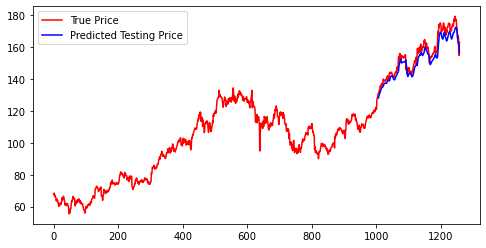

In [37]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

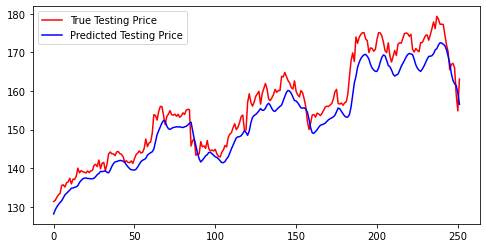

In [38]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()

In [39]:
x = x_test[-1]
num_next_predictions = 100
preds = []
for i in range(num_next_predictions):
    data = np.expand_dims(x, axis=0)
    prediction = model.predict(data)
    prediction = scaler.inverse_transform(prediction)
    preds.append(prediction[0][0])
    x = np.delete(x, 0, axis=0) # delete first
    x = np.vstack([x, prediction]) # add prediction

print(preds)

[156.54114, 366.87845, 462.40363, 491.0546, 500.05206, 502.81345, 503.536, 503.584, 503.4307, 503.24048, 503.06833, 502.92804, 502.81964, 502.7386, 502.6792, 502.6368, 502.60706, 502.58707, 502.57437, 502.5672, 502.56387, 502.56378, 502.5658, 502.5698, 502.5751, 502.58154, 502.58908, 502.59766, 502.6072, 502.61755, 502.62875, 502.64, 502.6507, 502.65964, 502.66547, 502.66623, 502.66113, 502.6492, 502.63303, 502.61737, 502.60913, 502.6166, 502.64505, 502.6883, 502.7193, 502.6762, 502.4477, 501.86005, 500.694, 498.7911, 495.86386, 494.8769, 494.8335, 494.8286, 494.82773, 494.82767, 494.82828, 494.82904, 494.82986, 494.83047, 494.8313, 494.83212, 494.83292, 494.83377, 494.83456, 494.83545, 494.8363, 494.83707, 494.83783, 494.83875, 494.8395, 494.84033, 494.84122, 494.84192, 494.84274, 494.84354, 494.84448, 494.84515, 494.8461, 494.84686, 494.8477, 494.84866, 494.8495, 494.85022, 494.85098, 494.8519, 494.8528, 494.8535, 494.85437, 494.8551, 494.8559, 494.85696, 494.85767, 494.85846, 494.85

In [ ]:
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')